# Abstract

Analysts are tasked with finding meaningful insight from data in their domain.

Wrangling data from a mirade of sources and transforming it's content into meaningful information is a foundational task in providing value as an analyst.

This package provides examples on how to incorporate common types of data into Python objects ready for analysis.

Data types and sources covered include:

* Structured files
* Unstructured files
* API sourced
* Scraped website sourced
* Cloud managed

Key Objective:

* Provide a template for analysts to read various data sources into structured Python objects.

Key Benefits:

* Time-saving and re-producible functions to incorporate data into Python objects.
* Introduce a foundation to programatically extract data for meaningful reporting and automation.

Secondary Benfits:

* Introduce Python package management to analysts hoping to grow their programming expertise.
* Display a working Python package that analyst's can understand and modify for their own needs.

# Structured

In [10]:
from src.read_data.structured.read import get_csv_data
cpi = get_csv_data(".\src\data\CPIAUCSL.csv") # https://fred.stlouisfed.org/series/CPIAUCSL
cpi.tail(5)

,DATE,CPIAUCSL
916,2023-05-01,303.294
917,2023-06-01,303.841
918,2023-07-01,304.348
919,2023-08-01,306.269
920,2023-09-01,307.481


In [1]:
from src.read_data.structured.read import get_excel_data
cpi = get_excel_data(".\src\data\CPIAUCSL.xls")
cpi.tail(5)

,FRED Graph Observations,Unnamed: 1
926,2023-05-01 00:00:00,303.294
927,2023-06-01 00:00:00,303.841
928,2023-07-01 00:00:00,304.348
929,2023-08-01 00:00:00,306.269
930,2023-09-01 00:00:00,307.481


In [28]:
from src.read_data.structured.read import get_json_data
history = get_json_data(method="pandas",path=".\src\data\en_historic_events.json", orient="index")
history.tail(5)

,count,events
result,37859,"[{'date': '-300', 'description': 'Pilgrims tra..."


In [3]:
from src.read_data.structured.read import get_json_data
history = get_json_data(method="custom",path=".\src\data\en_historic_events.json", orient="index")
history.sample(5)

,date,description,lang,category1,category2,granularity
19610,1852/01/15,Nine men representing various Hebrew charitab...,en,January&amp;amp;amp;ndash;March,NaN,year
8972,1160/05/18,Richard FitzNeal is named Treasurer of the Exc...,en,By place,Europe,year
8131,1075,Revolt of the Earls: Three earls rebel against...,en,NaN,NaN,year
2200,77,Pliny the Elder publishes the first ten books ...,en,By topic,Arts and sciences,year
4396,429,The Temple of Goddess Athena on the Acropolis ...,en,By place,Roman Empire,year


In [17]:
import plotly.express as px
import re

# Define a custom function to extract and convert years
def extract_and_convert_year(date):
    try:
        year = int(date)
        return year
    except ValueError:
        match = re.search(r'(-?\d+)', str(date))
        if match:
            year = int(match.group(0))
            return year
        return None

# Apply the custom function to the 'date' column
history['year'] = history['date'].apply(extract_and_convert_year)

history = history.dropna()

grouped = history.groupby(by=["year","category2"]).count()
grouped.reset_index(inplace=True)
grouped['event_count'] = grouped['description']

fig = px.bar(grouped,
             x="year",y="event_count",color="category2", 
             title="Yearly World History Events by Category Definitions in JSON",
             template="plotly_dark")
fig.show()

# Unstructured

In [3]:
from src.read_data.unstructured.text import get_dict_from_txt, get_structured_dict, get_structured_dataframe

d_unstructured, unique_keys = get_dict_from_txt(".\\src\\data\\text_product_data.txt")
print(f"unique keys: {unique_keys}")
print(f"unstructured data sample: {str(d_unstructured)[:50]}")

d_structured = get_structured_dict(d_unstructured,unique_keys)
print(f"structured data sample: {str(d_structured)[:50]}")

d_dataframe = get_structured_dataframe(d_structured)
print("\n Text File DataFrame:")
display(d_dataframe.head())

unique keys: {'ProductTypeName', 'CatalogNumberList', 'PackageDimensions', 'IsAutographed', 'HazardousMaterialType', 'NumberOfTracks', 'UPC', 'NumberOfDiscs', 'ItemDimensions', 'Binding', 'ManufacturerPartsWarrantyDescription', 'UPCList', 'Size', 'Title', 'Model', 'IsEligibleForTradeIn', 'ItemPartNumber', 'Artist', 'Warranty', 'NumberOfPages', 'CEROAgeRating', 'PartNumber', 'Department', 'OperatingSystem', 'ESRBAgeRating', 'Platform', 'Color', 'ISBN', 'Creator', 'PublicationDate', 'ClothingSize', 'EANList', 'TrackSequence', 'ListPrice', 'RegionCode', 'LegalDisclaimer', 'TradeInValue', 'Languages', 'MediaType', 'Author', 'PackageQuantity', 'Edition', 'MPN', 'Brand', 'SKU', 'Genre', 'Feature', 'Publisher', 'IsAdultProduct', 'ProductGroup', 'AspectRatio', 'EAN', 'ProductTypeSubcategory', 'NumberOfItems', 'Studio', 'IsMemorabilia', 'Label', 'Format', 'ReleaseDate', 'ManufacturerMinimumAge', 'HardwarePlatform', 'Manufacturer', 'ManufacturerMaximumAge'}
unstructured data sample: {'1': {'Bind

,Brand,MPN,Title,Manufacturer,ProductGroup,ProductTypeName,CatalogNumberList,PackageDimensions,IsAutographed,HazardousMaterialType,...,ProductTypeSubcategory,NumberOfItems,Studio,IsMemorabilia,Label,Format,ReleaseDate,ManufacturerMinimumAge,HardwarePlatform,ManufacturerMaximumAge
1,Mediasonic,HW180STB,Mediasonic HW180STB HomeWorx HDTV Digital Conv...,Major League Global Enterprise LLC,Home Theater,TUNER,HW180STB,4501170135910,None,None,...,None,1,Major League Global Enterprise LLC,None,Major League Global Enterprise LLC,None,None,None,None,None
2,SANOXY,SANOXY_ANLG_AU-DIG_AU-2,SANOXY® Analog to Digital Audio Converter Adapter,BrainyTrade,Home Theater,TUNER,None,24054060470,None,None,...,None,None,BrainyTrade,None,BrainyTrade,None,None,None,None,None
3,Magnavox,TB100MW9,Magnavox DTV Digital to Analog Converter,Magnavox,CE,DIGITAL_VIDEO_RECORDER,None,3701130210840,None,None,...,None,None,Magnavox,None,Magnavox,None,None,None,None,None
4,Digital Stream,DTX9900,Digital Stream Digital-to-Analog Converter Box,Digital Stream,CE,CE_ACCESSORY,None,1801090190920,None,None,...,None,None,Digital Stream,None,Digital Stream,None,None,None,None,None
5,Insignia,NS-DXA1,Insignia NS-DXA1 Digital to Analog TV Tuner Co...,Insignia,CE,DIGITAL_VIDEO_RECORDER,None,2701270295930,None,None,...,None,None,Insignia,None,Insignia,None,None,None,None,None


# APIs

In [8]:
from utils.api_utils import get_api_key
from src.read_data.api.request import get_request_data

url = "https://newsapi.org/v2/top-headlines"
api_key = get_api_key(".\\config\\news_api_key.json","key")
params = {
    "country":"us",
    "apiKey":api_key
}

news_headlines = get_request_data(url, params)
news_headlines

{'status': 'ok',
 'totalResults': 36,
 'articles': [{'source': {'id': None, 'name': 'CNBC'},
   'author': 'Amanda Macias, Katrina Bishop, Ruxandra Iordache',
   'title': "Israel-Hamas war live updates: Palestinian data provider says internet is cut off; Israeli army forces 'expanding their activity' in Gaza - CNBC",
   'description': 'Israel said it\'s increasing its air attacks on Gaza and "expanding" its ground forces. A Palestinian data provider said internet service have been cut off.',
   'url': 'https://www.cnbc.com/2023/10/27/israel-hamas-war-updates-and-latest-news-on-gaza-conflict.html',
   'urlToImage': 'https://image.cnbcfm.com/api/v1/image/107324212-1698391673915-gettyimages-1746015335-AFP_33Z92E3.jpeg?v=1698391712&w=1920&h=1080',
   'publishedAt': '2023-10-27T18:10:00Z',
   'content': "The U.S. launched strikes on two facilities in eastern Syria used by Iran's Islamic Revolutionary Guard Corps in retaliation for attacks on U.S. forces in Iraq and Syria by Iranian-backed mi

In [11]:
import pandas as pd
articles = news_headlines["articles"]
df_news_headlines = pd.DataFrame(articles)
df_news_headlines.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'CNBC'}","Amanda Macias, Katrina Bishop, Ruxandra Iordache",Israel-Hamas war live updates: Palestinian dat...,Israel said it's increasing its air attacks on...,https://www.cnbc.com/2023/10/27/israel-hamas-w...,https://image.cnbcfm.com/api/v1/image/10732421...,2023-10-27T18:10:00Z,The U.S. launched strikes on two facilities in...
1,"{'id': 'reuters', 'name': 'Reuters'}",Alexandre Meneghini,Looting in Mexico's Acapulco after devastating...,Looting broke out in the Mexican city of Acapu...,https://www.reuters.com/world/americas/mexico-...,https://www.reuters.com/resizer/343X-QdWW1_8--...,2023-10-27T18:05:00Z,"ACAPULCO, Mexico, Oct 27 (Reuters) - Looting b..."
2,"{'id': None, 'name': 'CNBC'}",MacKenzie Sigalos,FTX's Sam Bankman-Fried tells jury that he did...,"Sam Bankman-Fried, the founder of failed crypt...",https://www.cnbc.com/2023/10/27/ftxs-sam-bankm...,https://image.cnbcfm.com/api/v1/image/10721782...,2023-10-27T17:57:29Z,"Former FTX Chief Executive Sam Bankman-Fried, ..."
3,"{'id': 'reuters', 'name': 'Reuters'}","Niket Nishant, Lananh Nguyen, Nupur Anand",JPMorgan chief Dimon to sell some of his own c...,"JPMorgan Chase <a href=""https://www.reuters.co...",https://www.reuters.com/business/finance/jpmor...,https://www.reuters.com/resizer/_fc_Q9K28x7QZe...,2023-10-27T17:51:00Z,Oct 27 (Reuters) - JPMorgan Chase (JPM.N) Chie...
4,"{'id': 'cnn', 'name': 'CNN'}",Taylor Nicioli,A full moon and partial lunar eclipse just in ...,A full moon and partial lunar eclipse treat wi...,https://www.cnn.com/2023/10/27/world/partial-l...,https://media.cnn.com/api/v1/images/stellar/pr...,2023-10-27T17:44:00Z,Sign up for CNNs Wonder Theory science newslet...


# Scraped

In [12]:
from src.read_data.scraped.beautifulsoup import scrape_website, get_website_data

noaa = scrape_website("https://www.climate.gov/news-features/understanding-climate/2023-24-us-winter-outlook-wetter-south-warmer-north")
noaa

<!DOCTYPE html>

<html class="h-100" dir="ltr" lang="en" prefix="og: https://ogp.me/ns#">
<head>
<title>2023-24 U.S. winter outlook: wetter South, warmer North | NOAA Climate.gov</title>
<meta charset="utf-8"/>
<script async="" src="/sites/default/files/google_analytics/gtag.js?s37koc"></script>
<script>window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments)};gtag("js", new Date());gtag("set", "developer_id.dMDhkMT", true);gtag("config", "UA-42795060-1", {"groups":"default","linker":{"domains":["*.climate.gov","*.noaa.gov"]},"anonymize_ip":true,"link_attribution":true,"allow_ad_personalization_signals":false,"page_path":location.pathname + location.search + location.hash});gtag("config", "G-69P3KT57C3", {"groups":"default","linker":{"domains":["*.climate.gov","*.noaa.gov"]},"link_attribution":true,"allow_ad_personalization_signals":false,"page_location":location.pathname + location.search + location.hash});</script>
<meta content="US" name="geo.region"/>
<li

In [14]:
noaa_data = get_website_data("https://www.climate.gov/news-features/understanding-climate/2023-24-us-winter-outlook-wetter-south-warmer-north")
noaa_data

,URL,Title,Description,Images,Links
0,https://www.climate.gov/news-features/understa...,"2023-24 U.S. winter outlook: wetter South, war...",Drought improvement likely across the Southeas...,"[/themes/custom/climategov/img/close.svg, /the...","[#main-content, /, /news-features, /news-featu..."


# Cloud

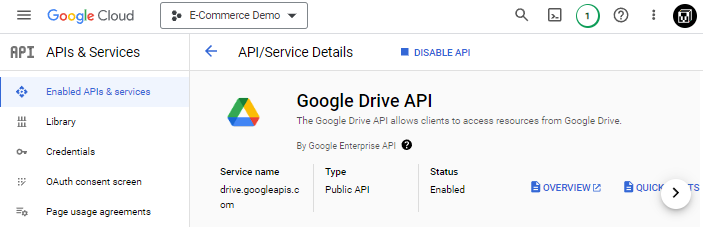

In [20]:
from utils.gcp_utils import key_path
from src.read_data.cloud.google_sheet import get_google_sheet_data

# Step 1: Allow editor access to your Google Service Account file's email within your Google Sheet
# Step 2: Enable Drive API from Google Cloud Platform to avoid 403 error
# Step 3: Enable Google Sheet API from Google Cloud Platform to avoid 403 error
products = get_google_sheet_data(
    method="pygsheets", 
    google_sheet_name="results-20230709-163100", 
    worksheet_name="Sheet1", 
    credential_path=key_path
    ) 
products.head()

,product_id_dim,price,title_length,has description,description_length,has_image,lead_time,gender
0,android+mens+paradise+short+sleeve+tee+olive,91,44,TRUE,,TRUE,3,M
1,men+s+google+performance+polo+gb+sm,112,35,TRUE,,TRUE,1,M
2,recycled+mouse+pad,15,18,FALSE,232,FALSE,3,
3,google+womens+short+sleeve+shirt+hero+tee+red+...,121,53,FALSE,78,TRUE,5,F
4,android+bttf+moonshot+shirt,66,27,TRUE,,TRUE,2,


In [21]:
from utils.gcp_utils import client
from src.read_data.cloud.gcp import get_bigquery_data

clickstream = get_bigquery_data("SELECT * FROM `e-commerce-demo-v.summary.s_ga_organic`", client)
clickstream.head()

,date,entry_page,medium,isTrueDirect,visits,transactions,revenue,pageviews,bounce_rate,entry_page_dim,...,bizdays,dayofweek,date_week,bizdays_week,date_month,bizdays_month,date_quarter,bizdays_quarter,date_year,bizdays_year
0,2017-08-01,shop.googlemerchandisestore.com/google+redesig...,organic,<NA>,1,0,NaN,9,0.0,shop.googlemerchandisestore.com/google+redesig...,...,1,3,2017-07-30,5,2017-08-01,23,2017-07-01,65,2017-01-01,260
1,2017-08-01,www.googlemerchandisestore.com/home,organic,<NA>,35,1,39.28,217,0.6,www.googlemerchandisestore.com/home,...,1,3,2017-07-30,5,2017-08-01,23,2017-07-01,65,2017-01-01,260
2,2017-08-01,shop.googlemerchandisestore.com/google+redesig...,organic,<NA>,1,0,NaN,1,1.0,shop.googlemerchandisestore.com/google+redesig...,...,1,3,2017-07-30,5,2017-08-01,23,2017-07-01,65,2017-01-01,260
3,2017-08-01,shop.googlemerchandisestore.com/google+redesig...,organic,True,1,0,NaN,1,1.0,shop.googlemerchandisestore.com/google+redesig...,...,1,3,2017-07-30,5,2017-08-01,23,2017-07-01,65,2017-01-01,260
4,2017-08-01,shop.googlemerchandisestore.com/google+redesig...,organic,<NA>,1,0,NaN,1,1.0,shop.googlemerchandisestore.com/google+redesig...,...,1,3,2017-07-30,5,2017-08-01,23,2017-07-01,65,2017-01-01,260
